In [1]:
import numpy as np
import pandas as pd
import random
import math
import networkx as nx 
import matplotlib.pyplot as plt 


In [2]:
node=pd.read_csv(r'C:\Users\PLUS\Desktop\Linkpy\sample dataset.txt')
number_of_node=int(node.columns.tolist()[0])
node = node[node.columns.tolist()[0]].str.split(" ", n = 1, expand = True)
node=node.values
node = node.astype(np.int)

C:\Users\PLUS\AppData\Local\Temp/ipykernel_12208/2407552744.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  node = node.astype(np.int)


In [3]:
adjaceny_matrix=np.zeros([number_of_node,number_of_node])


In [4]:
for i in range(len(node)):
    v_i=node[i][0]-1
    v_j=node[i][1]-1
    adjaceny_matrix[v_i,v_j]=1
    adjaceny_matrix[v_j,v_i]=1
m=(1/2)*(np.sum(adjaceny_matrix)  ) 

In [5]:
G = nx.Graph()

vertex=[]
for i in range(number_of_node):
    vertex.append(i)

In [6]:
for i in range(number_of_node): 
     for j in range( 0,number_of_node): 
        if adjaceny_matrix[i][j] == 1: 
            G.add_edge(i,j)
G.add_nodes_from(vertex)

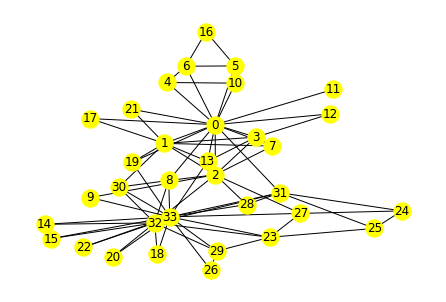

In [7]:
nx.draw( G,with_labels = True,node_color='yellow' ) 
plt.show()

In [8]:
def choromosome_safty():
    choromosome=[]
    #population is 100
    for i in range(100):
        temp_gene=[]
        for j in range(number_of_node):
            nonzeroind_index=np.nonzero(adjaceny_matrix[j,:])
            conncted_node_j=random.choice(nonzeroind_index[0])
            temp_gene.append(conncted_node_j)
            
        choromosome.append(temp_gene)
    return choromosome
       

In [9]:
def fitness(choromosome):
    cluster=[]
    
    fetnes=[]
    choromosome_node=set()
    for i in range(number_of_node):
        choromosome_node.add(i)
    
    for i in range(len(choromosome)):
        c={} # ci in formula
        f=0
        for j in range(34):
            choromosome_node.add(j)
        temp_cluster=[]
        adjaceny_matrix_choromosome=np.zeros([number_of_node,number_of_node])
        for j in range(34):
            adjaceny_matrix_choromosome[j][choromosome[i][j]]=1
            adjaceny_matrix_choromosome[choromosome[i][j]][j]=1
        while(i>-1):
            temp_s=set()
            temp_l=[]
            x=choromosome_node.pop()
            temp_l.append(x)
            for j in temp_l:
                for k in range(number_of_node):
                    
                    if(adjaceny_matrix_choromosome[j][k]==1):
                        if k not in temp_l:
                            temp_l.append(k)
                            choromosome_node.remove(k)
                 
            temp_cluster.append(temp_l) 
            if (len(choromosome_node)==0):
                break
                
        cluster.append(temp_cluster)
        
        for j in range(len(temp_cluster)):
            for k in range(len(temp_cluster[j])):
                c[temp_cluster[j][k]]=j
        for j in range(number_of_node):
            k_i=np.sum(adjaceny_matrix[j,:])
            for t in range(number_of_node):
                k_j=np.sum(adjaceny_matrix[:,t])
                if(c[j]==c[t]):
                    #print(c[j],c[t])
                    f=f+ adjaceny_matrix[j][t]-((k_i*k_j)/(2*m))
        fetnes.append(f/(2*m)) 
                         
     
    the_best_fetnes=[]
    for i in range(len(fetnes)):
        the_best_fetnes.append((fetnes[i],choromosome[i],cluster[i]))
    the_best_fetnes.sort(reverse=True,key=lambda x:x[0])
    the_best_fetnes=the_best_fetnes[0:50]
        
    fetnes=[] 
    choromosome=[]
    cluster=[]
    for i in range(len(the_best_fetnes)):
        fetnes.append(the_best_fetnes[i][0])
        choromosome.append(the_best_fetnes[i][1])
        cluster.append(the_best_fetnes[i][2])
 
    return fetnes,cluster,choromosome;                      
                         

In [10]:
def crossover(fetnes,choromosome):
    temp1=[]
    temp2=[]
    #print(fetnes)
    sum_fitness=sum(fetnes)
    parent=[]
    probability_fitness=[]
    child=[]
    
    for i in range(len(choromosome)):
        probability_fitness.append(abs((fetnes[i]))/(sum_fitness))
        
    roulette_selection=np.random.choice(fetnes,int(0.5*len(choromosome)),p=probability_fitness) #roulette selection
    roulette_selection=list(roulette_selection)
    for i in range(len(roulette_selection)):
        index=fetnes.index(roulette_selection[i])
        temp1.append(choromosome[index])
        
        
    if (len(temp1)%2!=0):
        temp1.pop()
    #print(temp1) 
    for i in range(len(temp1)):
            if (i!=0 ) & (i%2==0):
                parent.append(temp2)
                temp2=[]
                
            temp2.append(temp1[i])
    parent.append(temp2)        
    #print(parent)          
    for i in range(len(parent)):
        temp1=[] 
        temp2=[]
        vector_child1 = np.random.randint(0,2, size=(1,34))
        vector_child2 = np.random.randint(0,2, size=(1,34))
        for j in range(number_of_node):
            
            if(vector_child1[0][j]==0):
                temp1.append(parent[i][0][j])
            else:
                temp1.append(parent[i][1][j]) 
                
            if(vector_child2[0][j]==0):
                temp2.append(parent[i][0][j])
            else:
                temp2.append(parent[i][1][j])     
                
                
        child.append(temp1)
        child.append(temp2)
        
        
    return child    

In [11]:
def mutation(child,choromosome):
    pc=random.uniform(0, 1)
    if(pc>0.6):
        for i in range(len(child)):
            number_of_mutation=random.randint(0,5)
            indexs_mutation=random.sample(range(0,number_of_node),number_of_mutation)
            for j in indexs_mutation:
                nonzeroind_index=np.nonzero(adjaceny_matrix[j,:])
                conncted_node_j=random.choice(nonzeroind_index[0])
                child[i][j]=conncted_node_j
    child.extend(choromosome)
    return child
    

In [12]:
choromosome=choromosome_safty()


In [13]:
i=0
j=0
length_fetnes=[]
while j>-1:
    j=j+1
    
    fetnes,cluster,choromosome1=fitness(choromosome)
    
    if length_fetnes!=[]:
        if max(fetnes)==length_fetnes[-1]:
            i=i+1
            if i==50:
                break
        else:
            i=0
    length_fetnes.append(max(fetnes))        
    child=crossover(fetnes,choromosome1)
    
    choromosome=mutation(child,choromosome1)
    
    print(max(fetnes))
    print('i:',i)
    

0.3809171597633129
i: 0
0.3809171597633129
i: 1
0.3809171597633129
i: 2
0.3809171597633129
i: 3
0.3809171597633129
i: 4
0.40203813280736184
i: 0
0.40203813280736184
i: 1
0.40203813280736184
i: 2
0.40203813280736184
i: 3
0.40203813280736184
i: 4
0.40203813280736184
i: 5
0.40203813280736184
i: 6
0.40203813280736184
i: 7
0.40203813280736184
i: 8
0.40203813280736184
i: 9
0.4155982905982902
i: 0
0.4155982905982902
i: 1
0.4155982905982902
i: 2
0.4155982905982902
i: 3
0.4155982905982902
i: 4
0.4155982905982902
i: 5
0.4155982905982902
i: 6
0.4188034188034182
i: 0
0.4188034188034182
i: 1
0.4188034188034182
i: 2
0.4188034188034182
i: 3
0.4188034188034182
i: 4
0.4188034188034182
i: 5
0.41978961209730387
i: 0
0.41978961209730387
i: 1
0.41978961209730387
i: 2
0.41978961209730387
i: 3
0.41978961209730387
i: 4
0.41978961209730387
i: 5
0.41978961209730387
i: 6
0.41978961209730387
i: 7
0.41978961209730387
i: 8
0.41978961209730387
i: 9
0.41978961209730387
i: 10
0.41978961209730387
i: 11
0.41978961209730

Text(0, 0.5, 'fitnes')

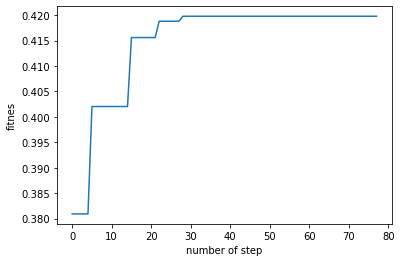

In [14]:
step=list(range(len(length_fetnes)))
plt.plot(step, length_fetnes)
plt.xlabel('number of step')
plt.ylabel('fitnes')

In [15]:
i=np.argmax(fetnes)
cluster=cluster[i]
print('maximum fetnes Q is:', max(fetnes))


maximum fetnes Q is: 0.41978961209730387


In [16]:
cluster

[[31, 25, 28, 23, 24, 27],
 [29, 26, 33, 8, 9, 15, 18, 30, 32, 14, 20, 22],
 [7, 1, 3, 19, 21, 0, 12, 2, 11, 13, 17],
 [16, 6, 4, 10, 5]]

In [17]:
G = nx.Graph()
vertex=[]
for i in range(34):
    vertex.append(i)

In [18]:
for i in range(number_of_node): 
     for j in range( 0,number_of_node): 
        if adjaceny_matrix[i][j] == 1: 
            G.add_edge(i,j)
G.add_nodes_from(vertex)
 

In [19]:
color_map={}
color=[]
color_final=[]
for i in range(len(cluster)):
      for j in cluster[i]:
        if(i==0):
              color_map[j]='yellow'
        if(i==1):
              color_map[j]='red'
        if(i==2):
              color_map[j]='pink'  
        if(i==3):
              color_map[j]='green'
for i in range(34):
    color.append(color_map[i])
for i in list(G):
    color_final.append(color_map[i])

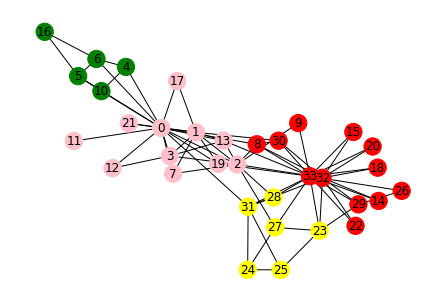

In [24]:
nx.draw(G, node_color=color_final, with_labels=True)
